In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Approaching the problem

This algorithm is quite simple as we want to find $k$ nearest datapoint (in term of Euclidean distance) to the unknown data we want to predict. After finding the nearest values, we use Plurality vote to decide the label.

Now let's define the function to determine the distance from out point of interest to each of the rest of the data:


In [40]:
def euclidean_distance(poi, datapoint):
    return np.sqrt(np.sum((np.array(poi) - np.array(datapoint)) ** 2))

# Creating a custom dataset

Let's use the make_blobs function in sklearn.datasets so that we can create a dataset that has some clusters and plot it to visualize our KNN classifier


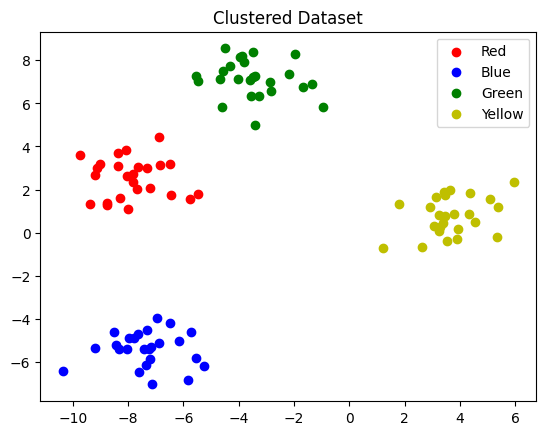

In [55]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=4, random_state=43)
cluster_1 = X[y == 0]
cluster_2 = X[y == 1]
cluster_3 = X[y == 2]
cluster_4 = X[y == 3]
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color='r')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], color='b')
plt.scatter(cluster_3[:, 0], cluster_3[:, 1], color='g')
plt.scatter(cluster_4[:, 0], cluster_4[:, 1], color='y')
plt.title("Clustered Dataset")
plt.legend(['Red', 'Blue', 'Green', 'Yellow'])
plt.show()

Let's create a point and plot it on the graph


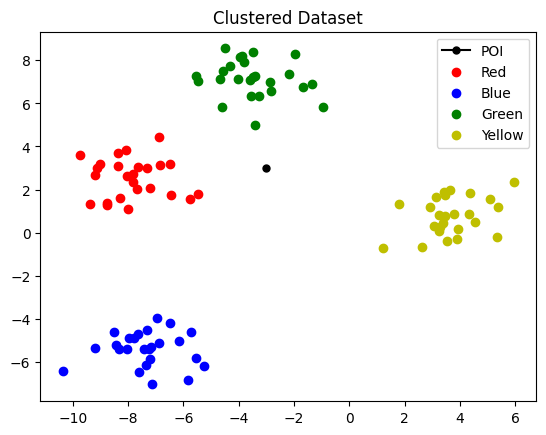

In [42]:
poi = [-3, 3]

result = np.array([])
for i in range(len(X[:20])):
    result = np.append(result, euclidean_distance(poi, X[i]))

plt.plot(poi[0], poi[1], marker="o", markersize=5, color="black")
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color='r')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], color='b')
plt.scatter(cluster_3[:, 0], cluster_3[:, 1], color='g')
plt.scatter(cluster_4[:, 0], cluster_4[:, 1], color='y')
plt.title("Clustered Dataset")
plt.legend(['POI', 'Red', 'Blue', 'Green', 'Yellow'])
plt.show()

# The algorithm


In [59]:
class KNNClassifier:

    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y


    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)


    def _predict(self, x):
        distances = [euclidean_distance(x, x_train)
                     for x_train in self.X_train]
        k_nearest = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_nearest]
        print(k_nearest_labels)
        most_common = np.bincount(k_nearest_labels).argmax()
        print(most_common)
        return most_common

# Testing


In [68]:
classes = ["red", "blue", "green", "yellow"]

knn = KNNClassifier(k=5)
knn.fit(X, y)
predictions = knn.predict(np.array(poi).reshape(1, -1))
print(f"The POI is in class: {classes[int(predictions)]}")

[2, 0, 0, 2, 2]
2
The POI is in class: green
